# Lab 7.3: Introduction to Logistic Regression

**Question 1**

1) Write a Python function that computes the value of the logistic function.  

2) Define an array of values from -6 to 6 (using `numpy.linspace`), use the logistic function to obtain the probabilites, and plot the values (x) against the probabilities (y).
  

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [52]:
t = arange(-20, 20)

def f(t):
    return exp(t) / (1 + exp(t))

# ylim((-0.2, 1.2))
# xlabel('$t$')
# ylabel('$f(t)$')
# plot(t, f);

In [13]:
np.linspace?

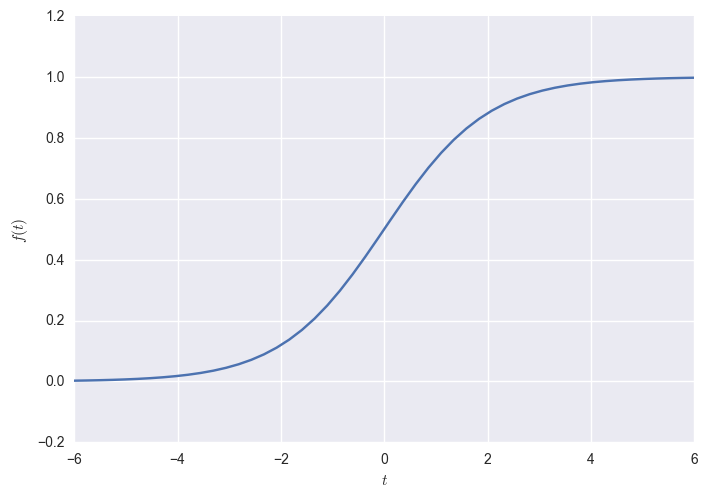

In [16]:
a = np.linspace(-6,6)

f = exp(a) / (1 + exp(a))

ylim((-0.2, 1.2))
xlabel('$t$')
ylabel('$f(t)$')
plot(a, f);

**Question 2**

You are given a data set with a binary response (`Shot`) in the `flu` table. The response of 1 represents people who have taken flu shots, 0 represents people who have not. `Age` represents the the age of the person and `Health_aware` is a score of how health aware the person is.


1) As usual, make plots to explore your data. By inspecting the scatter matrix, guess if people who are more health aware would be more likely to have got flu shots and if people who are old would be more likely to have got flu shots.


2) Why would it be inappropriate to use linear regression for this problem ?

   
3) Fit the data to a logistic regression model. Logistic regression is fitted in a similar manner in Python as linear regression, except the function we use is `Logit`.
  
 
4) Do the regression coefficients confirm your guesses in Part 1)? Why or why not?   

5) How would you interpret the regression coefficients?

In [22]:
%load_ext sql
%pylab inline  
import pandas as pd
import yaml

# pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

# engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

# pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
# connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

# %sql $connection_string

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
Populating the interactive namespace from numpy and matplotlib


'Connected: student@postgres'

In [28]:
from sqlalchemy import create_engine
import yaml
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))
conn = engine.connect()

# r = pd.read_sql('select * from cloth_sales', engine)
# r = pd.read_sql("""select date_trunc('week', dt) from cloth_sales""", engine)
r = pd.read_sql('select * from flu', engine)

r.head()
# SELECT date_trunc('hour', TIMESTAMP '2001-02-16 20:38:40')

,patient_id,Shot,Age,Health_aware
0,0,0.0,38.0,40.0
1,1,1.0,52.0,60.0
2,2,0.0,41.0,36.0
3,3,1.0,46.0,59.0
4,4,1.0,41.0,70.0


1) As usual, make plots to explore your data. By inspecting the scatter matrix, guess if people who are more health aware would be more likely to have got flu shots and if people who are old would be more likely to have got flu shots.


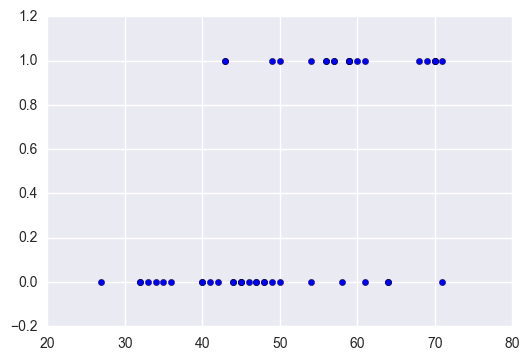

In [41]:
# plot(r.Health_aware, r.Shot, type = 'scatter')
matplotlib.pyplot.scatter(r.Health_aware, r.Shot)

# yes, people who are more health aware are more likely to have the flu shot

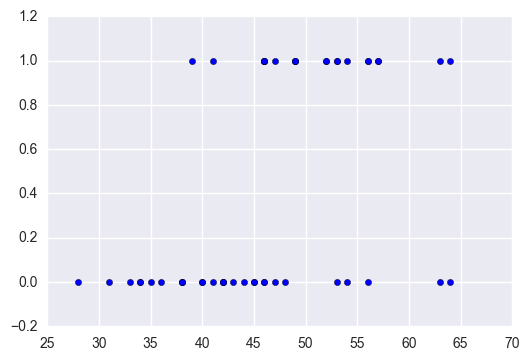

In [42]:
matplotlib.pyplot.scatter(r.Age, r.Shot)

#yes, people who are older are more likely to have gotten the flu shot.

2) Why would it be inappropriate to use linear regression for this problem ?

A linear regression is not appropriate because the value we are trying to predict is a boolean value.

3) Fit the data to a logistic regression model. Logistic regression is fitted in a similar manner in Python as linear regression, except the function we use is `Logit`.

In [46]:
logit_model1 = smf.logit("Shot ~ Age + Health_aware", data=r).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.324163
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.5235
Time:                        15:21:48   Log-Likelihood:                -16.208
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.848e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.5846      6.418     -3.363      0.001     -34.164      -9.005
Age              0.2218      0.074      2.983      0.003       0.076       0.368
Health_aware     0.2035      0.063      3.244      0.001       0.081       0.326
================================================================================
"""

In [49]:
# r.dropna()
# sns.lmplot("Age", "Health_aware", r, hue="Shot", logistic=True, size=8, aspect=1.5, y_jitter=.1);

In [ ]:
4) Do the regression coefficients confirm your guesses in Part 1)? Why or why not?   

# yes, because both coefficients are positive, so age or health_aware increases, so does the "y" used to calculate the predicted value
# So higher age or health_aware leads to higher probabiliy of having flu shot.

# 5) How would you interpret the regression coefficients? - omit

**Question 3**  

The data set https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv has data on 61 married couples. The dependent variable is HAPPYMAR, respondent’s marital happiness (1 = Very Happy, 0 = Otherwise). CHURCH, Church attendance (1 = Often attends, 0 = other), FEMALE (1 = female, 0 = male), and EDUC, Years of education, are the explanatory variables.  

1) Run the logistic regression of happymar on church, female and educ.  

2) Are all three explanatory variables needed in the model?  

3) Based on the signs of the logistic regression coefficients (positive or negative), interpret their impact on the probability of a happy marriage. Any surprises?  

4) Determine the probability of marital happiness for: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer. 

In [57]:
df = pd.read_csv("https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv")
df.head()

,happymar,church,female,educ
0,0,0,0,9
1,1,0,1,10
2,1,1,1,16
3,1,1,1,11
4,1,1,1,12


In [58]:
logit_model1 = smf.logit("happymar ~ church + female + educ", data=df).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.403833
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               happymar   No. Observations:                   61
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.3823
Time:                        15:36:32   Log-Likelihood:                -24.634
converged:                       True   LL-Null:                       -39.881
                                        LLR p-value:                 1.086e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1586      3.285     -2.483      0.013     -14.598      -1.719
church         2.9075      0.921      3.158      0.002       1.103       4.712
female         2.3945      0.877      2.729      0.006       0.675       4.114
educ           0.5267      0.265      1.986      0.047       0.007       1.046
==============================================================================
"""

2) Are all three explanatory variables needed in the model?

Yes, the p-value for each explanatory variable is significant (under .05)

3) Based on the signs of the logistic regression coefficients (positive or negative), interpret their impact on the probability of a happy marriage. Any surprises?

no, they are all positive, so they positively contribute to a happy marriage.
If we order the predictors by their magnitude, we can see that church attentdance has the highest impact on happy marrriage, followed by female, and lastly by an additional year of education.

4) Determine the probability of marital happiness for: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer. 

In [60]:
### list is intercept, church, female, education
def pred(x):
   a = -8.1586*x[0] + 2.9075*x[1] + 2.3945*x[2] + .5267*x[3]
   return f(a)


print('a:', pred([1, 0, 0, 8]))
print('b:', pred([1, 1, 0, 8]))
print('c:', pred([1, 0, 1, 16]))
print('d:', pred([1, 1, 1, 16]))

a: 0.0189838556711
b: 0.261632658562
c: 0.934813825899
d: 0.9962062525
